# Programación para la Bioinformática

Unidad 3: Librerías científicas en Python - Scipy - Ejercicios
-------------------------------------------------

Ejercicios
----------

A continuación tenéis el único ejercicio a resolver en esta parte del módulo. Dada la especificidad de los algoritmos que se implementan en la librería Scipy, hemos seleccionado un problema más simple que los mostrados como ejemplo.

### Ejercicio 1: Calculando los átomos en la interfaz de unión de dos proteínas
Dos proteínas A y B se unen para formar un complejo proteico. Se define la interfaz de unión entre A y B como los átomos de A que están a una distancia de 4Å (Angstroms) o menos de cualquier átomo de B. En la siguiente figura, la proteína A está representada en azul y la proteína B en naranja. Los átomos de B que están en contacto con algún átomo de A se han coloreado en verde:


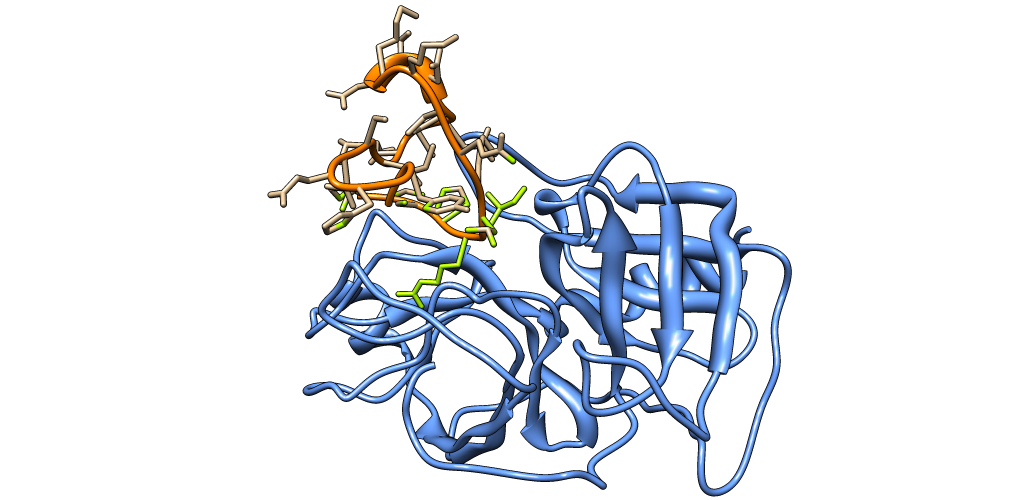

A continuación, tenéis el código que tendréis que completar. Tenéis que calcular el número de átomos de A y de B que están en contacto con átomos de B y de A respectivamente y el número total de átomos en la interfaz. **Pista**: podéis utilizar la función _[scipy.spatial.distance.cdist](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist)_ y la función _numpy.where_.


In [7]:
import numpy as np
import os
import scipy.spatial


def lee_coordenadas_atomo(linea):
    """Interpreta las coordenadas de una línea de un fichero PDB que empiece por 
    ATOM (es un átomo)"""
    if linea.startswith('ATOM  '):
        x = float(linea[30:38])
        y = float(linea[38:46])
        z = float(linea[46:54])
        return [x, y, z]

    
def obtiene_coordenadas(estructura):
    """Lee una estructura (fichero PDB) y obtiene las coordenadas de los 
    átomos que contiene"""
    coordenadas = []
    with open(estructura) as input:
        lineas = [linea.rstrip(os.linesep) for linea in input.readlines()]
        for linea in lineas:
            atomo = lee_coordenadas_atomo(linea)
            if atomo:
                coordenadas.append(atomo)
    return np.array(coordenadas)

# Descargando datos
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/1PPE_rec.pdb --no-check-certificate
!wget -nc https://gitlab.uoclabs.uoc.es/prog_bioinf/data/-/raw/master/Unidad3/1PPE_lig.pdb --no-check-certificate

# Coordenadas_1 tiene las coordenadas de la proteína A en formato numpy
coordenadas_1 = obtiene_coordenadas('1PPE_rec.pdb')

# Coordenadas_2 tiene las coordenadas de la proteína B en formato numpy
coordenadas_2 = obtiene_coordenadas('1PPE_lig.pdb')

# Código a completar:
dist=scipy.spatial.distance.cdist(coordenadas_1,coordenadas_2)
# Partimos del array con las distancias entre átomos, donde las filas se refieren a los átomos de A y las columnas hacen referencia a los átomos de B
# Ahora creamos un array con aquellos casos donde se cumple que la distancia es menor de 4
# En los casos donde se cumpla, lo sustituimos por TRUE y donde no se cumpla lo sustituimos por FALSE
array=np.where(dist<=4,"True", "False")
print(array)

# Ahora queremos calcular los átomos de A que están en contacto con B y para ellos tenemos que contar cuántas filas tienen TRUE.
atomos_A_B = 0
for fila in array:
  if "True" in fila:
    atomos_A_B+=1
print("Número de átomos de A en contacto con B: ", atomos_A_B)

# Ahora tenemos que contar las columnas
# No he encontrado como contar las columnas así que he traspuesto la matriz
array2=array.T
atomos_B_A = 0
for fila in array2:
  if "True" in fila:
    atomos_B_A+=1
print("Número de átomos de B en contacto con A: ", atomos_B_A)

# Finalmente, el número de átomos total será la suma de ambos:
print("Número total de átomos en contacto: ", atomos_A_B + atomos_B_A)

File ‘1PPE_rec.pdb’ already there; not retrieving.

File ‘1PPE_lig.pdb’ already there; not retrieving.

[['False' 'False' 'False' ... 'False' 'False' 'False']
 ['False' 'False' 'False' ... 'False' 'False' 'False']
 ['False' 'False' 'False' ... 'False' 'False' 'False']
 ...
 ['False' 'False' 'False' ... 'False' 'False' 'False']
 ['False' 'False' 'False' ... 'False' 'False' 'False']
 ['False' 'False' 'False' ... 'False' 'False' 'False']]
Número de átomos de A en contacto con B:  68
Número de átomos de B en contacto con A:  51
Número total de átomos en contacto:  119


# Atención:

Una duda muy común en el apartado de Scipy de la PEC4 es si el número de átomos de la proteína A en contacto con la proteína B es el mismo que el número de átomos de la proteína B en contacto con la proteína A?

La respuesta es no, no es el mismo número. Hay que eliminar los átomos repetidos.

Es decir en el caso hipotético: 
* Tenemos 2 proteínas protA y protB. 
* ProtA tiene 2 átomos A1 y A2.
* ProtB tiene 3 átomos B1, B2 y B3. 
* A1 está aislado y no está en contacto con ningún átomo de protB.
* A2 está en contacto con B1 y B3.
* B2 está aislado y no está en contacto con nadie.


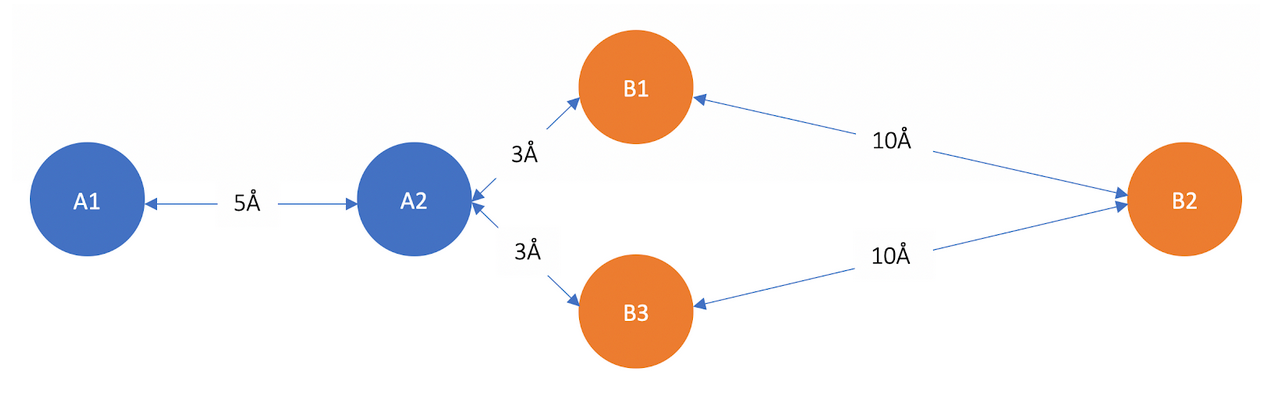

En el escenario planteado:

* Contactos (<4A) de A - B: 2 [ A2 -- B1, A2 -- B3 ]
* Contactos (<4A) de B - A: 2 [ B1 -- A2, B3 -- A2 ] 

Pero lo que se pide en la PEC es:

* **Número de átomos de A en contacto con B: 1** [ A2 ]
* **Número de átomos de B en contacto con A: 2** [ B1, B3 ]